In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_rows', None)

In [2]:
#loading the dataset
balance_sheet = pd.read_excel("Documents/Balance_Sheet.xlsx")
income_statement = pd.read_excel("Documents/Income_Statement.xlsx")
cash_flow = pd.read_json("Downloads/cash_flow_tech.json")

In [3]:
income_statement = income_statement.drop("Unnamed: 0", axis=1)

In [4]:
income_statement.head()

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [5]:
balance_sheet = balance_sheet.drop("Unnamed: 0", axis=1)

In [6]:
balance_sheet.head()

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [7]:
#compute current ration
balance_sheet["Current Ratio"] = balance_sheet["Total Current Assets"] / balance_sheet["Total Current Liabilities"]

In [8]:
#compute the average current ratio by industry
balance_sheet.groupby("comp_type")["Current Ratio"].mean()

comp_type
fmcg        0.868631
real_est    1.025647
tech        2.561735
Name: Current Ratio, dtype: float64

In [9]:
#group by year and industry
balance_sheet.groupby(["Year","comp_type"])["Current Ratio"].mean()

Year  comp_type
2018  fmcg         0.894033
      real_est     0.918590
      tech         4.070359
2019  fmcg         0.801619
      real_est     0.956540
      tech         2.587904
2020  fmcg         0.958568
      real_est     1.039277
      tech         2.609484
2021  fmcg         0.868201
      real_est     1.188182
      tech         2.074543
2022  fmcg         0.654545
      tech         1.331981
Name: Current Ratio, dtype: float64

In [10]:
#Add Industry Average Current Ratio
balance_sheet["Industry Current Ratio"] = balance_sheet.groupby(["Year","comp_type"])["Current Ratio"].transform("mean")

#finding the relative difference between current ration and industry ratio
balance_sheet["Relative Difference"] = (balance_sheet["Current Ratio"] / 
                                        balance_sheet["Industry Current Ratio"]) - 1

balance_sheet.head() #Preview DataFrame

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,1.540126,2.587904,-0.404875
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1.363604,2.609484,-0.477443
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,1.074553,2.074543,-0.482029
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.879356,1.331981,-0.339814
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824


In [11]:
#subsetting tech and fmcg companies in the year 2019 and 2020
balance_sheet.loc[balance_sheet["Year"].isin([2019,2020]) & balance_sheet["comp_type"].isin(["tech","fmcg"])].head()

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,1.540126,2.587904,-0.404875
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1.363604,2.609484,-0.477443
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824
5,2020,tech,MSFT,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,2.515765,2.609484,-0.035914
9,2019,tech,GOOG,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,3.374052,2.587904,0.303778


In [12]:
# Merge Income Statement and Balance Sheet
pd.set_option('display.max_columns', None)
merge_data = pd.merge(balance_sheet, income_statement, on=["Year", "company", "comp_type"])
merge_data.head() # Preview merged DataFrame


,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,1.540126,2.587904,-0.404875,161782000000,98392000000,63930000000,196244000000,260174000000
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1.363604,2.609484,-0.477443,169559000000,104956000000,66288000000,208227000000,274515000000
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,1.074553,2.074543,-0.482029,212981000000,152836000000,108949000000,256868000000,365817000000
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.879356,1.331981,-0.339814,223546000000,170782000000,119437000000,274891000000,394328000000
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824,42910000000,82933000000,42959000000,82884000000,125843000000


In [13]:
# Function to Compute Ratio
def compute_ratio(df, numerator, denominator, ratio_name):
    df[ratio_name] = df[numerator] / df[denominator]
    return df
# Compute Ratios using Function
merge_data = compute_ratio(merge_data, "Total Liab", "Total Stockholder Equity", "Debt_to_equity")
merge_data = compute_ratio(merge_data, "Gross Profit", "Total Revenue", "Gross Margin")
merge_data = compute_ratio(merge_data, "Operating Income", "Total Revenue", "Operating Margin")
merge_data = compute_ratio(merge_data, "Total Assets", "Total Stockholder Equity", "Equity Multiplier")

In [14]:
#computing gross margin
#merge_data["Gross Margin"] =  merge_data["Gross Profit"]/merge_data["Total Revenue"]

#computing operating margin
#merge_data["Operating Margin"] = merge_data["Operating Income"] / merge_data["Total Revenue"]

#computing equity multiplier
#merge_data["Equity Multiplier"] = merge_data["Total Assets"] / merge_data["Total Stockholder Equity"]

In [15]:
#Average Company Ratio
avg_company_ratio = merge_data.pivot_table(index=["comp_type", "company"], values=["Gross Margin", "Operating Margin", 
                                                               "Debt_to_equity", "Equity Multiplier"], aggfunc="mean").reset_index()
avg_company_ratio.head() # Preview average company ratios

,comp_type,company,Debt_to_equity,Equity Multiplier,Gross Margin,Operating Margin
0,fmcg,KO,3.414927,4.519331,0.605645,0.295483
1,fmcg,NSRGY,1.529240,2.544988,0.492077,0.169367
2,fmcg,PEP,4.824934,5.831271,0.545523,0.155981
3,fmcg,PG,1.552942,2.579259,0.495070,0.229222
4,fmcg,UL,3.667435,4.774069,0.433665,0.185504


In [16]:
#Average Industry Ratio
avg_industry_ratio = merge_data.pivot_table(index=["comp_type"], values=["Gross Margin", "Operating Margin", 
                                                               "Debt_to_equity", "Equity Multiplier"], aggfunc="mean").reset_index()
avg_industry_ratio.head() # Preview average industry ratios

,comp_type,Debt_to_equity,Equity Multiplier,Gross Margin,Operating Margin
0,fmcg,2.997896,4.049784,0.514396,0.207112
1,real_est,5.692041,7.353476,0.534848,0.299938
2,tech,1.777448,2.777448,0.572062,0.273889


In [17]:
# Prepare Data for Plots
molten_plot_company = pd.melt(avg_company_ratio, id_vars=["comp_type", "company"])
molten_plot_industry = pd.melt(avg_industry_ratio, id_vars="comp_type")
molten_plot_company.head()

,comp_type,company,variable,value
0,fmcg,KO,Debt_to_equity,3.414927
1,fmcg,NSRGY,Debt_to_equity,1.529240
2,fmcg,PEP,Debt_to_equity,4.824934
3,fmcg,PG,Debt_to_equity,1.552942
4,fmcg,UL,Debt_to_equity,3.667435


In [18]:
molten_plot_industry["company"] = "Industry Average"
molten_plot = pd.concat([molten_plot_company, molten_plot_industry]) # Combine Company and Industry
molten_plot.head() # Preview combined data

,comp_type,company,variable,value
0,fmcg,KO,Debt_to_equity,3.414927
1,fmcg,NSRGY,Debt_to_equity,1.529240
2,fmcg,PEP,Debt_to_equity,4.824934
3,fmcg,PG,Debt_to_equity,1.552942
4,fmcg,UL,Debt_to_equity,3.667435


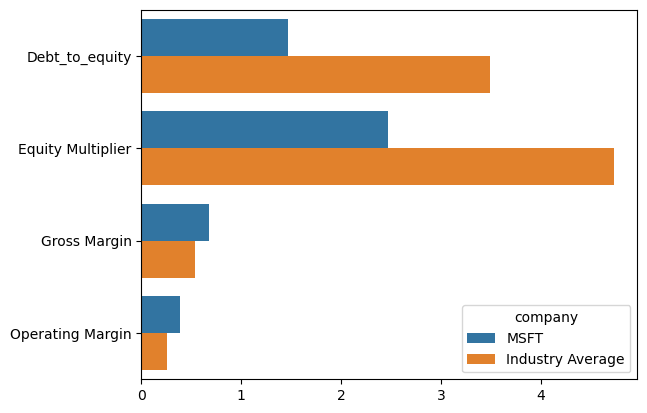

In [19]:
# Filter for Microsoft and Industry Average
msft = molten_plot.loc[molten_plot["company"].isin(["MSFT", "Industry Average"])]

sns.barplot(data=msft, y="variable", x="value", hue="company", errorbar=None)
plt.xlabel(""), plt.ylabel("")
plt.show()

In [20]:
msft_data = merge_data.loc[merge_data["company"] == "MSFT"]
msft_data.head()

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Debt_to_equity,Gross Margin,Operating Margin,Equity Multiplier
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824,42910000000,82933000000,42959000000,82884000000,125843000000,1.800313,0.659020,0.341370,2.800313
5,2020,tech,MSFT,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,2.515765,2.609484,-0.035914,46078000000,96937000000,52959000000,90056000000,143015000000,1.546921,0.677810,0.370304,2.546921
6,2021,tech,MSFT,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,2.079994,2.074543,0.002628,52232000000,115856000000,69916000000,98172000000,168088000000,1.350755,0.689258,0.415949,2.350755
7,2022,tech,MSFT,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,1.784607,1.331981,0.339814,62650000000,135620000000,83383000000,114887000000,198270000000,1.190679,0.684017,0.420553,2.190679


In [21]:
# Compute asset turnover ratio
#msft_data["asset_turnover"] = msft_data["Total Revenue"] / msft_data["Total Assets"]

# Compute gross margin ratio
#msft_data["gross_margin"] = (msft_data["Total Revenue"] - msft_data["Cost Of Goods Sold"]) / msft_data["Total Revenue"]

In [22]:
# Compute asset turnover ratio
msft_data.loc[:, 'asset_turnover'] = msft_data["Total Revenue"] / msft_data["Total Assets"]

# Compute gross margin ratio
msft_data.loc[:, 'gross_margin'] = (msft_data["Total Revenue"] - msft_data["Cost Of Goods Sold"]) / msft_data["Total Revenue"]

C:\Users\USER\AppData\Local\Temp\ipykernel_21296\1084353416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_data.loc[:, 'asset_turnover'] = msft_data["Total Revenue"] / msft_data["Total Assets"]
C:\Users\USER\AppData\Local\Temp\ipykernel_21296\1084353416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_data.loc[:, 'gross_margin'] = (msft_data["Total Revenue"] - msft_data["Cost Of Goods Sold"]) / msft_data["Total Revenue"]


In [23]:
msft_data

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Debt_to_equity,Gross Margin,Operating Margin,Equity Multiplier,asset_turnover,gross_margin
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824,42910000000,82933000000,42959000000,82884000000,125843000000,1.800313,0.659020,0.341370,2.800313,0.439157,0.659020
5,2020,tech,MSFT,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,2.515765,2.609484,-0.035914,46078000000,96937000000,52959000000,90056000000,143015000000,1.546921,0.677810,0.370304,2.546921,0.474642,0.677810
6,2021,tech,MSFT,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,2.079994,2.074543,0.002628,52232000000,115856000000,69916000000,98172000000,168088000000,1.350755,0.689258,0.415949,2.350755,0.503591,0.689258
7,2022,tech,MSFT,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,1.784607,1.331981,0.339814,62650000000,135620000000,83383000000,114887000000,198270000000,1.190679,0.684017,0.420553,2.190679,0.543444,0.684017


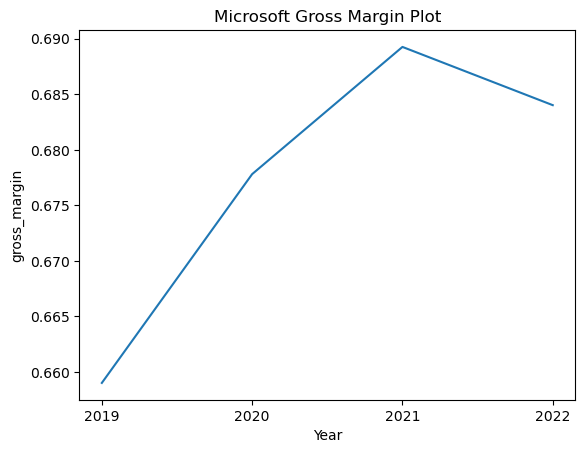

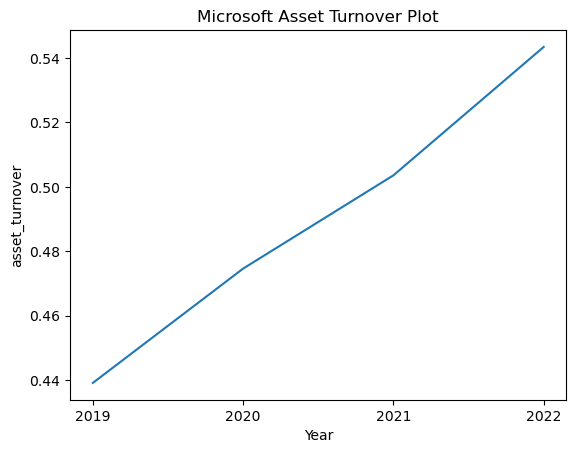

In [24]:
from matplotlib.ticker import MaxNLocator

# Gross margin plot
gross_margin_plot = sns.lineplot(data=msft_data, x='Year', y='gross_margin')
gross_margin_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Microsoft Gross Margin Plot")
plt.show()
plt.close()

# Asset turnover plot 
asset_turnover_plot = sns.lineplot(data=msft_data, x='Year', y='asset_turnover')
asset_turnover_plot.xaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.title("Microsoft Asset Turnover Plot")
plt.show()
plt.close()

In [25]:
cash_flow.head()

,Year,Capital Expenditures,Change In Cash,Change To Account Receivables,Change To Inventory,Change To Liabilities,Change To Netincome,Change To Operating Activities,Depreciation,Dividends Paid,Investments,Issuance Of Stock,Net Borrowings,Net Income,Other Cashflows From Financing Activities,Other Cashflows From Investing Activities,Repurchase Of Stock,Total Cash From Financing Activities,Total Cash From Operating Activities,Total Cashflows From Investing Activities,comp_type,company,Effect Of Exchange Rate
0,2019,-10495000000,24311000000,245000000,-2.890000e+08,-2548000000,5076000000,-896000000,12547000000,-1.411900e+10,58093000000,7.810000e+08,-7819000000,55256000000,-105000000.0,-1.078000e+09,-6.971400e+10,-90976000000,69391000000,45896000000,tech,AAPL,NaN
1,2020,-7309000000,-10435000000,6917000000,-1.270000e+08,-1981000000,6517000000,881000000,11056000000,-1.408100e+10,5453000000,NaN,2499000000,57411000000,754000000.0,-9.090000e+08,-7.599200e+10,-86820000000,80674000000,-4289000000,tech,AAPL,NaN
2,2021,-11085000000,-3860000000,-10125000000,-2.642000e+09,14002000000,2985000000,-6146000000,11284000000,-1.446700e+10,-3075000000,NaN,12665000000,94680000000,976000000.0,-3.520000e+08,-9.252700e+10,-93353000000,104038000000,-14545000000,tech,AAPL,NaN
3,2022,-10708000000,-10952000000,-1823000000,1.484000e+09,9926000000,10044000000,-8387000000,11104000000,-1.484100e+10,-9560000000,NaN,-123000000,99803000000,-160000000.0,-1.780000e+09,-9.562500e+10,-110749000000,122151000000,-22354000000,tech,AAPL,NaN
4,2019,-13925000000,-590000000,-2812000000,5.970000e+08,4694000000,-2521000000,-1542000000,11600000000,-1.381100e+10,540000000,1.142000e+09,-4000000000,39240000000,-675000000.0,-1.241000e+09,-1.954300e+10,-36887000000,52185000000,-15773000000,tech,MSFT,-115000000.0


In [26]:
# Merge income statement data with balance sheet data
merged_income_statement_balance_sheet = pd.merge(income_statement, balance_sheet, on=["Year", "company"])

# Now merge it with cash flow data
merged_all = pd.merge(cash_flow, merged_income_statement_balance_sheet, on=["Year", "company"])


In [27]:
merged_all.columns

Index(['Year', 'Capital Expenditures', 'Change In Cash',
       'Change To Account Receivables', 'Change To Inventory',
       'Change To Liabilities', 'Change To Netincome',
       'Change To Operating Activities', 'Depreciation', 'Dividends Paid',
       'Investments', 'Issuance Of Stock', 'Net Borrowings', 'Net Income',
       'Other Cashflows From Financing Activities',
       'Other Cashflows From Investing Activities', 'Repurchase Of Stock',
       'Total Cash From Financing Activities',
       'Total Cash From Operating Activities',
       'Total Cashflows From Investing Activities', 'comp_type', 'company',
       'Effect Of Exchange Rate', 'comp_type_x', 'Cost Of Goods Sold',
       'Gross Profit', 'Operating Income', 'Total Operating Expenses',
       'Total Revenue', 'comp_type_y', 'Accounts Payable', 'Cash', 'Inventory',
       'Property Plant Equipment', 'Short Term Investments', 'Total Assets',
       'Total Current Assets', 'Total Current Liabilities', 'Total Liab',
     

In [28]:
# Compute cash flow to net income ratio
merged_all["cash_flow_to_net_income"] = merged_all["Total Cash From Operating Activities"] / merged_all["Net Income"]

# Compute operating cash flow ratio
merged_all["operating_cash_flow"] = merged_all["Total Cash From Operating Activities"] / merged_all["Total Current Liabilities"]

# Compute the average ratios
average_ratios = merged_all.pivot_table(index="Year", values = ["cash_flow_to_net_income", "operating_cash_flow"])
average_ratios

,cash_flow_to_net_income,operating_cash_flow
Year,,
2018,1.978225,2.002246
2019,1.892268,1.092949
2020,1.763830,1.171911
2021,1.282083,1.235200
2022,1.223986,0.864842


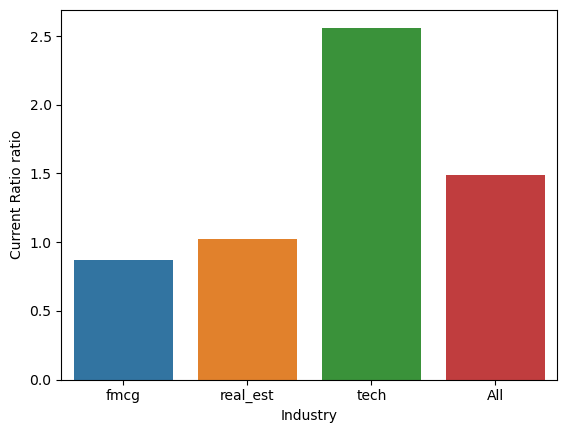

In [29]:
# Compute debt-to-equity ratio
#merge_data["debt_to_equity"] = dataset["Total Liab"]/dataset["Total Stockholder Equity"]

# Use pivot table to compute average debt-to-equity ratios
pivot_data = merge_data.pivot_table(index = "comp_type", values = "Current Ratio", margins=True)

# Make the bar plot
sns.barplot(data=pivot_data.reset_index(), x="comp_type", y="Current Ratio")
plt.xlabel("Industry")
plt.ylabel("Current Ratio ratio")
plt.show()
plt.close()

In [30]:
merge_data.head()

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Current Ratio,Industry Current Ratio,Relative Difference,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Debt_to_equity,Gross Margin,Operating Margin,Equity Multiplier
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,1.540126,2.587904,-0.404875,161782000000,98392000000,63930000000,196244000000,260174000000,2.741004,0.378178,0.245720,3.741004
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1.363604,2.609484,-0.477443,169559000000,104956000000,66288000000,208227000000,274515000000,3.957039,0.382332,0.241473,4.957039
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,1.074553,2.074543,-0.482029,212981000000,152836000000,108949000000,256868000000,365817000000,4.563512,0.417794,0.297824,5.563512
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.879356,1.331981,-0.339814,223546000000,170782000000,119437000000,274891000000,394328000000,5.961537,0.433096,0.302887,6.961537
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,2.528839,2.587904,-0.022824,42910000000,82933000000,42959000000,82884000000,125843000000,1.800313,0.659020,0.341370,2.800313


In [31]:
#computing the average current ratio by industry
merge_data.pivot_table(index ="comp_type", values = "Debt_to_equity")

,Debt_to_equity
comp_type,
fmcg,2.997896
real_est,5.692041
tech,1.777448


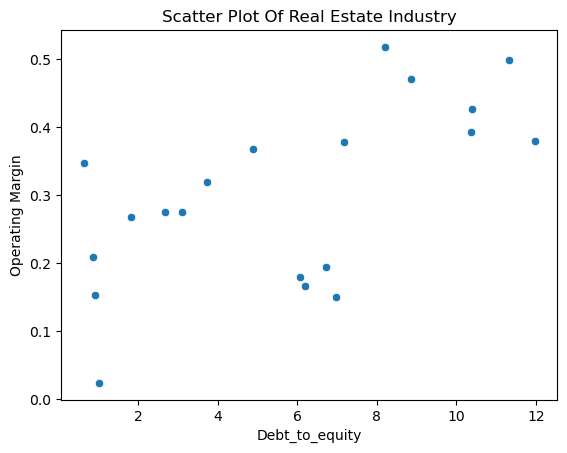

In [32]:

# Subset the real_est companies
dataset_real_est = merge_data.loc[merge_data["comp_type"]=="real_est"]
# Make the plot
sns.scatterplot(data = dataset_real_est, x="Debt_to_equity", y="Operating Margin")
plt.title("Scatter Plot Of Real Estate Industry")
plt.show()
plt.close()

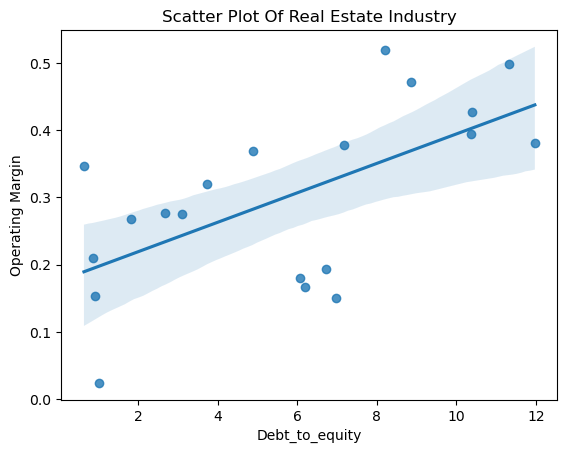

In [33]:
# Make the reg plot
sns.regplot(data=dataset_real_est, x="Debt_to_equity", y="Operating Margin")
plt.title("Scatter Plot Of Real Estate Industry")
plt.show()
plt.close()